<a href="https://colab.research.google.com/github/TanuRajput110/Zomato-EDA/blob/main/Zomato.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Zomato(EDA)**

##**1---Preprocessing The Data**

###import libraries and load dataset





In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

In [ ]:
#set size for figures
matplotlib.rcParams['figure.figsize']=(12,6)

In [ ]:
#import drive into collab
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#read the csv file (first dataframe) and store it into a variable
df=pd.read_csv('/content/gdrive/MyDrive/projects and csv/zomato..csv',encoding='latin-1')

In [ ]:
#top 5 rows of dataframe
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,Third Floor Century City Mall Kalayaan Avenue ...,Century City Mall Poblacion Makati City,Century City Mall Poblacion Makati City Makati...,121.027535,14.565443,French Japanese Desserts,1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,Little Tokyo 2277 Chino Roces Avenue Legaspi V...,Little Tokyo Legaspi Village Makati City,Little Tokyo Legaspi Village Makati City Makat...,121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat Edsa ShangriLa,162,Mandaluyong City,Edsa ShangriLa 1 Garden Way Ortigas Mandaluyon...,Edsa ShangriLa Ortigas Mandaluyong City,Edsa ShangriLa Ortigas Mandaluyong City Mandal...,121.056831,14.581404,Seafood Asian Filipino Indian,4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,Third Floor Mega Fashion Hall SM Megamall Orti...,SM Megamall Ortigas Mandaluyong City,SM Megamall Ortigas Mandaluyong City Mandaluyo...,121.056475,14.585318,Japanese Sushi,1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,Third Floor Mega Atrium SM Megamall Ortigas Ma...,SM Megamall Ortigas Mandaluyong City,SM Megamall Ortigas Mandaluyong City Mandaluyo...,121.057508,14.584450,Japanese Korean,1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [ ]:
#shape of dataframe
df.shape

(9551, 21)

In [ ]:
#Name of all columns we have
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [ ]:
#information of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [ ]:
#descriptive information
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,73.262397,26.990459,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,21.545863,7.818726,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.095697,28.481188,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.205421,28.572300,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.300825,28.644668,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


###Check for missing values and visualize and replace those.

In [ ]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [ ]:
#column which have null values
[i for i in df.columns if df[i].isnull().sum()>0]

['Cuisines']

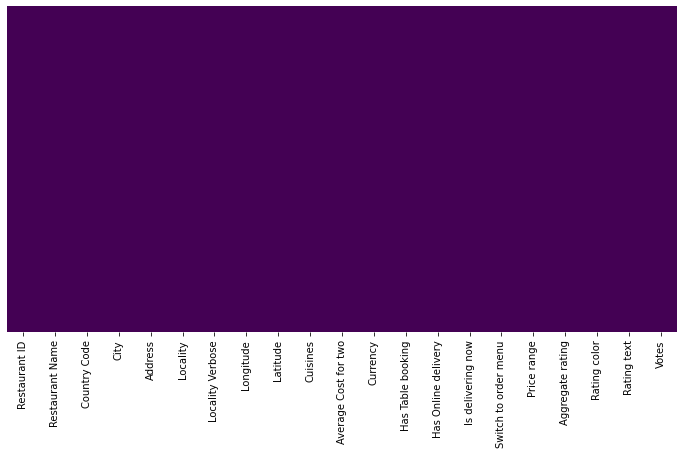

In [ ]:
#we can also use heatmap to see null values
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

i can't able to see those 9 null records becoze they are too less values but they are probabily somewhere 

In [ ]:
#import second dataframe
df2=pd.read_excel('/content/gdrive/MyDrive/projects and csv/Copy of Country-Code.xlsx')
df2.head()


,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [ ]:
#merge both dataframes and final dataframe
final_df=pd.merge(df,df2,on='Country Code',how='left')
final_df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,Third Floor Century City Mall Kalayaan Avenue ...,Century City Mall Poblacion Makati City,Century City Mall Poblacion Makati City Makati...,121.027535,14.565443,French Japanese Desserts,1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,Little Tokyo 2277 Chino Roces Avenue Legaspi V...,Little Tokyo Legaspi Village Makati City,Little Tokyo Legaspi Village Makati City Makat...,121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat Edsa ShangriLa,162,Mandaluyong City,Edsa ShangriLa 1 Garden Way Ortigas Mandaluyon...,Edsa ShangriLa Ortigas Mandaluyong City,Edsa ShangriLa Ortigas Mandaluyong City Mandal...,121.056831,14.581404,Seafood Asian Filipino Indian,4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,Third Floor Mega Fashion Hall SM Megamall Orti...,SM Megamall Ortigas Mandaluyong City,SM Megamall Ortigas Mandaluyong City Mandaluyo...,121.056475,14.585318,Japanese Sushi,1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,Third Floor Mega Atrium SM Megamall Ortigas Ma...,SM Megamall Ortigas Mandaluyong City,SM Megamall Ortigas Mandaluyong City Mandaluyo...,121.057508,14.584450,Japanese Korean,1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


###Loading final dataframe after merge

In [ ]:
#another way to check datatype
final_df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object

In [ ]:
#columns name after merging dataframes
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [ ]:
#Zomato counts in each country
final_df.Country.value_counts()

India             8652
United States      434
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: Country, dtype: int64

###CHECKING OUTLIERS

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


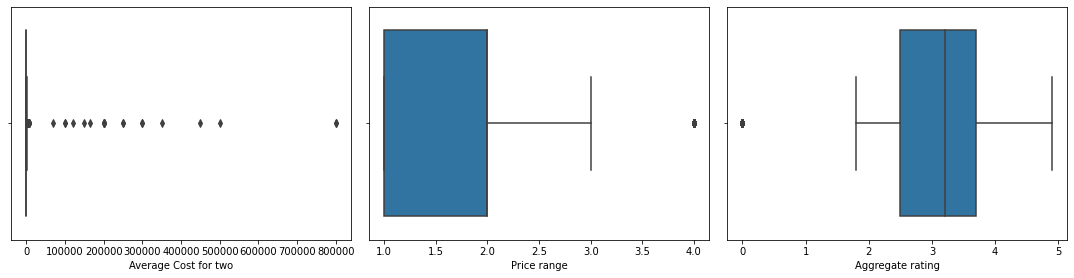

In [ ]:
#making boxplot of all numerical columns
columns=['Average Cost for two',  'Price range', 'Aggregate rating']
n = 1
plt.figure(figsize=(20,15))
for i in columns:
  plt.subplot(4,4,n)
  n = n+1
  sns.boxplot(df[i])
  plt.tight_layout()

here we can see that we have outliers in column Average cost for 2.but actually they are not outliers they belongs from different currency .

so we don't need to remove them.

##**EDA------(EXPLORATORY DATA ANALYSIS)**

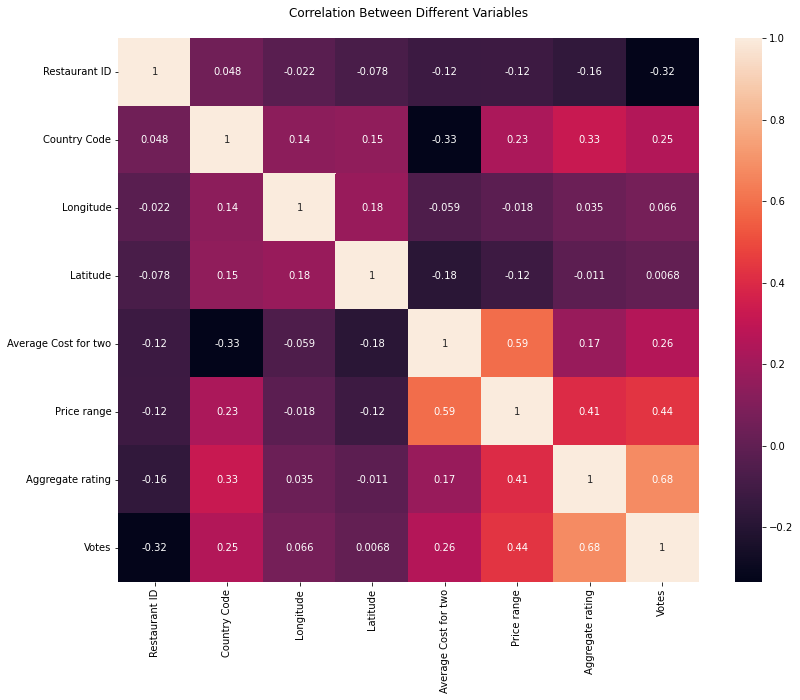

In [ ]:
corr = final_df.corr(method='kendall')
plt.figure(figsize=(13,10))
plt.title("Correlation Between Different Variables\n")
sns.heatmap(corr, annot=True)
plt.show()

####**QUESTION (1)---WHICH COUNTRY HAS THE HIGHEST COUNT OF ZOMATO..**

In [ ]:
#columns name of new dataframe
countryname=final_df.Country.value_counts().index
countryname


Index(['India', 'United States', 'United Kingdom', 'Brazil', 'UAE',
       'South Africa', 'New Zealand', 'Turkey', 'Australia', 'Phillipines',
       'Indonesia', 'Singapore', 'Qatar', 'Sri Lanka', 'Canada'],
      dtype='object')

In [ ]:
#counts of zomato in each country in new dataframe
countofzomato=final_df.Country.value_counts().values
countofzomato

array([8652,  434,   80,   60,   60,   60,   40,   34,   24,   22,   21,
         20,   20,   20,    4])

india has the maximum base of zomato .so maximum no. of transaction is happenning in India.

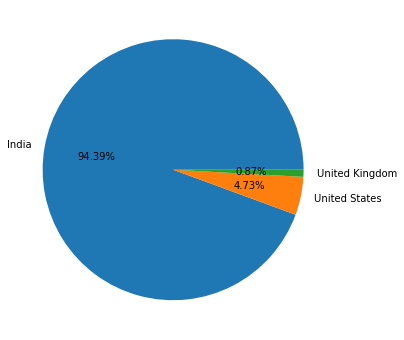

In [ ]:
#pie chart top 3 country having largest zomato base
plt.pie(countofzomato[0:3],labels=countryname[0:3],autopct="%1.2f%%")
plt.show()

**-------------------------------INDIA HAS THE HIGHEST COUNT OF ZOMATO .94.39% OF ZOMATO ARE IN INDIA.-----------------------------------**

####**QUESTION(2)---RATINGS RECEIVED BY THE ZOMATO MOST.**

In [ ]:
#lets take a look on all ratings categorywise
rating=final_df.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0:'Rating Count'})
rating

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


what we observe is that---

when ratings is between 4.5 to 4.9 --->Excellent

when rating is between 4.0 to 4.4 is ---->very good

when rating is between 3.5 to 3.9 is ---->good

when rating is between 2.5 to 3.4 is ---->average

when rating is between 1.8 to 2.4 is ---->poor


we can observe here that,

highest number of zomato have--> 0 ratings (not rated count are highest)

and maximum ratings are between  2.5 to 3.4.

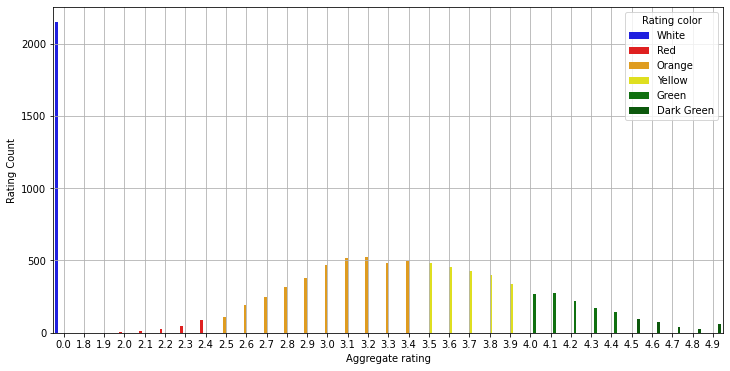

In [ ]:
#barplot to show the relation between aggregate raing and rating count

sns.barplot(x="Aggregate rating",y="Rating Count",hue='Rating color',data=rating,palette=['blue','red','orange','yellow','Green','darkGreen'])
plt.grid()

**----------------------------------we can observe that zomato is rated most between 2.5 to 3.4.--------------------------------------**

In [ ]:
#find the country name given the 4.9 ratings
zeroratingcountry=final_df[final_df["Aggregate rating"]==4.9].groupby(['Country','Aggregate rating']).size().reset_index().rename(columns={0:'counts'})
zeroratingcountry

,Country,Aggregate rating,counts
0,Brazil,4.9,3
1,India,4.9,19
2,Indonesia,4.9,4
3,New Zealand,4.9,2
4,Phillipines,4.9,3
5,Qatar,4.9,1
6,South Africa,4.9,3
7,Sri Lanka,4.9,1
8,Turkey,4.9,3
9,UAE,4.9,4


In [ ]:
#find the country name given the 0 ratings
zeroratingcountry=final_df[final_df["Aggregate rating"]==0.0].groupby(['Country','Aggregate rating']).size().reset_index().rename(columns={0:'counts'})
zeroratingcountry

,Country,Aggregate rating,counts
0,Brazil,0.0,5
1,India,0.0,2139
2,United Kingdom,0.0,1
3,United States,0.0,3


**---------------------maximum number of 0 and 4.9 ratings are from India.-------------------------------**

####**QUESTION(3)---WHICH COUNTRY DID THE MAXIMUM TRANSACTION.**

In [ ]:
#find out which currency is used by which country
curencycount=final_df.groupby(['Country','Currency']).size().reset_index().rename(columns={0:'curr.count'})
curencycount

,Country,Currency,curr.count
0,Australia,Dollar($),24
1,Brazil,Brazilian Real(R$),60
2,Canada,Dollar($),4
3,India,Indian Rupees(Rs.),8652
4,Indonesia,Indonesian Rupiah(IDR),21
5,New Zealand,NewZealand($),40
6,Phillipines,Botswana Pula(P),22
7,Qatar,Qatari Rial(QR),20
8,Singapore,Dollar($),20
9,South Africa,Rand(R),60


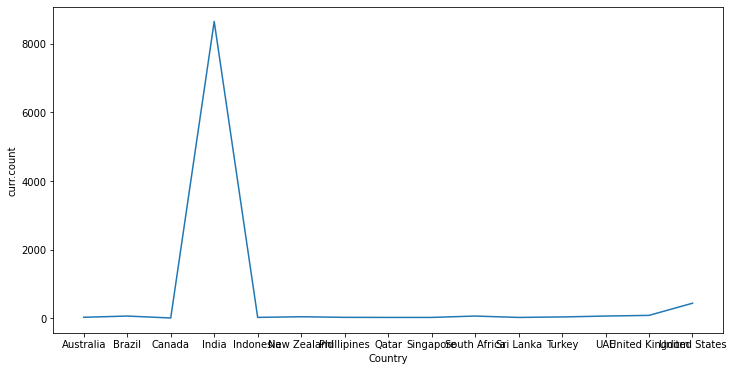

In [ ]:
sns.lineplot(data=curencycount, x='Country', y='curr.count')

**------WE CAN SEE THAT INDIA DID THE MAXIMUM TRANSACTION OF CURRENCY.WHICH MEANS INDIA USES THE ZOMATO MOST-----**

####**QUESTION(4)---WHICH COUNTRIES DO HAVE ONLINE DELIVERY OPTION?**

In [ ]:
#which country do have online delivery
final_df[final_df['Has Online delivery']=='Yes'].Country.value_counts()

India    2423
UAE        28
Name: Country, dtype: int64

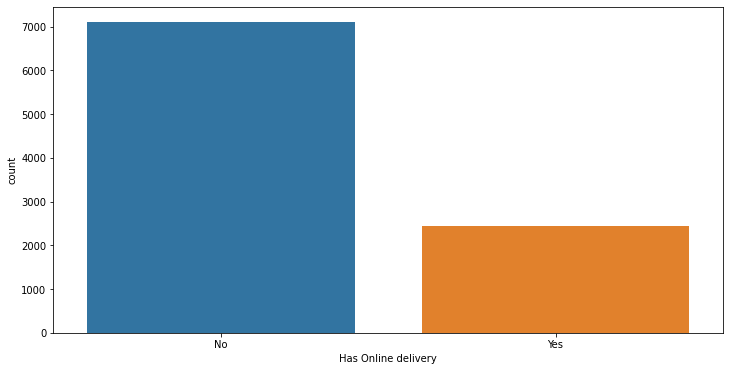

In [ ]:
#total count of online delivery
sns.countplot(data=final_df, x='Has Online delivery')

**total count of online delivery is 2451.(india-2423 and UAE=28)**

In [ ]:
#Which country have or have not online delivery option
online_del=final_df[['Has Online delivery','Country']].groupby(['Has Online delivery','Country']).size().reset_index().rename(columns={0:'count'})
online_del

,Has Online delivery,Country,count
0,No,Australia,24
1,No,Brazil,60
2,No,Canada,4
3,No,India,6229
4,No,Indonesia,21
5,No,New Zealand,40
6,No,Phillipines,22
7,No,Qatar,20
8,No,Singapore,20
9,No,South Africa,60


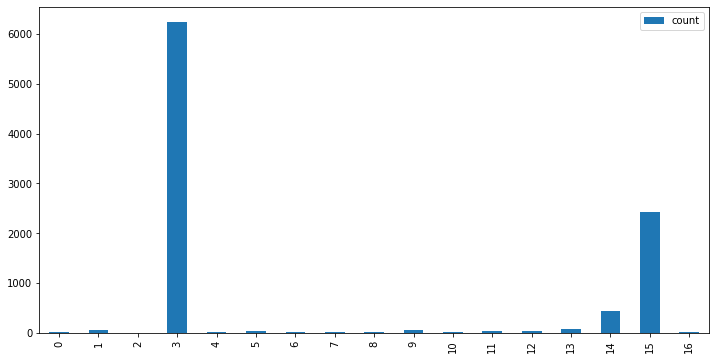

In [ ]:
online_del.plot(kind='bar')

**------------online delivery are available in India(in 2423 regions) and UAE(in 28 regions)----------------.**

####**QUESTION(5)---WHICH REGION IN INDIA HAS THE MAXIMUM NUMBER OF ZOMATO?**

In [ ]:

final_df.City.value_counts().index

Index(['New Delhi', 'Gurgaon', 'Noida', 'Faridabad', 'Ghaziabad',
       'Bhubaneshwar', 'Amritsar', 'Ahmedabad', 'Lucknow', 'Guwahati',
       ...
       'Ojo Caliente', 'Montville', 'Monroe', 'Miller', 'Middleton Beach',
       'Panchkula', 'Mc Millan', 'Mayfield', 'Macedon', 'Vineland Station'],
      dtype='object', length=141)

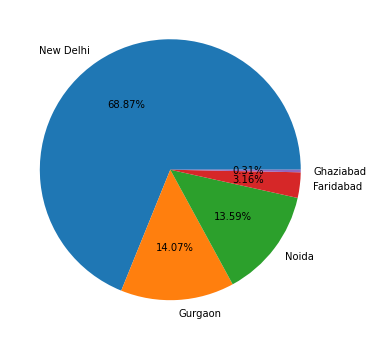

In [ ]:
#pie chart of citiesdistribution
plt.pie(final_df.City.value_counts()[:5].values,labels=final_df.City.value_counts()[:5].index,autopct='%1.2f%%')
plt.show()

**-----------------------IN INDIA,New Delhi has the maximum number of zomato.------------------------------------**

####**QUESTION(6)---WHICH CUISINES ZOMATO  HAVE MAXIMUM ?**

In [ ]:
#find the top 10 cuisines
final_df['Cuisines'].value_counts().head()

North Indian            936
North Indian Chinese    511
Chinese                 354
Fast Food               354
North Indian Mughlai    334
Name: Cuisines, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Cuisines')

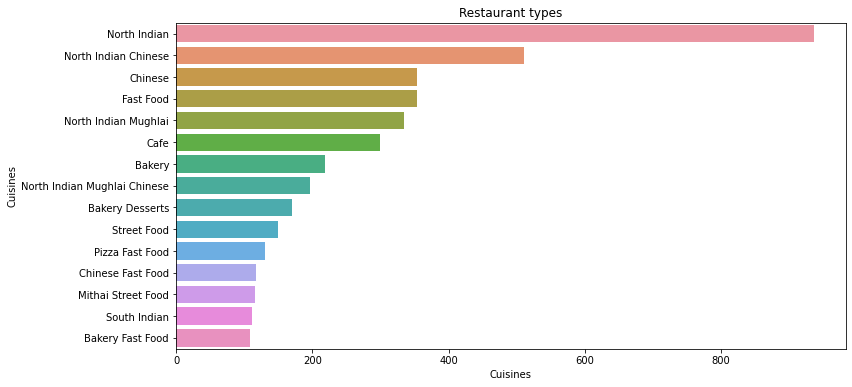

In [ ]:
x=final_df['Cuisines'].value_counts()[0:15]
sns.barplot(x,x.index)
plt.title("Restaurant types")
plt.ylabel('Cuisines')

**--------------------------Zomato has the maximum North Indian Cuisines.---------------------------------**

####**QUESTION(7)---DOES ONLINE DELIVERY IMPACTS ON THE RATINGS OF ZOMATO?**

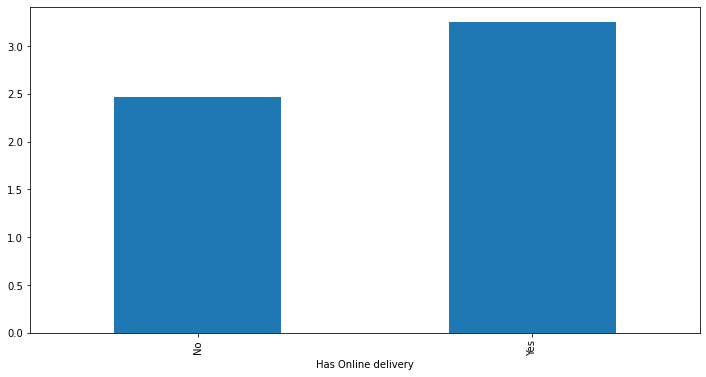

In [ ]:
#relation between online delivery and ratings
final_df.groupby('Has Online delivery')['Aggregate rating'].mean().plot.bar()

**------------------Avaliblity of online ordering facility has impact on rating.-----------------------**



####**QUESTION(8)---DOES TABLE BOOKING IMPACTS ON THE RATINGS OF ZOMATO?**

Text(0, 0.5, 'Rating')

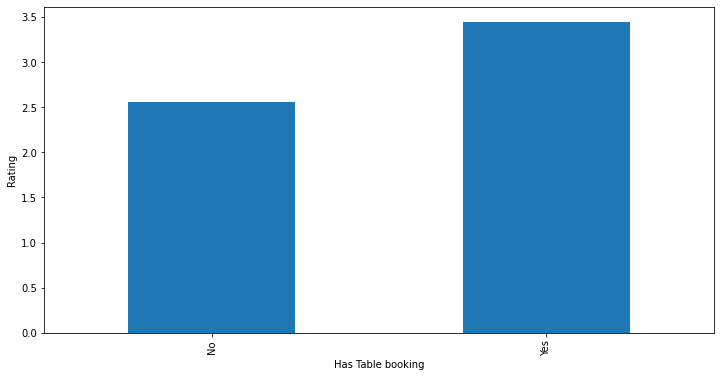

In [ ]:
final_df.groupby('Has Table booking')['Aggregate rating'].mean().plot.bar()
plt.ylabel('Rating')

**-----------------Restaurants with table booking facility have higher ratings.-----------------**

####**QUESTION(9)---WHICH COUNTRY HAVE THE HIGHEST AVERAGE COST FOR 2 PEOPLE IN ZOMATO?**(IF COMPARED WITH INDIAN CURRENCY)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


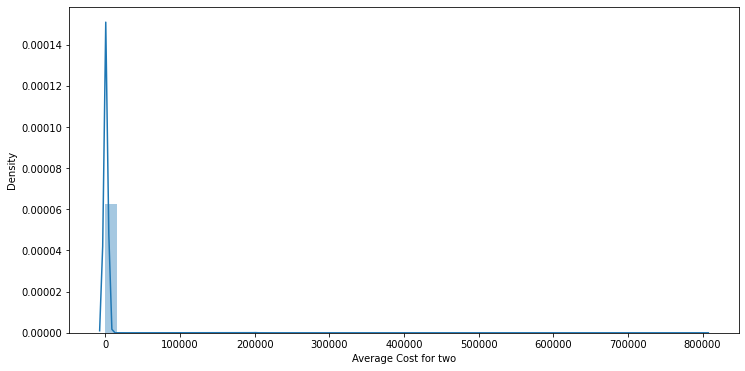

In [ ]:
#distribution of cost for 2 peoples

sns.distplot(final_df['Average Cost for two'])

In [ ]:
final_df.groupby('Currency')['Average Cost for two'].max()

Currency
Botswana Pula(P)            6000
Brazilian Real(R$)           400
Dollar($)                    500
Emirati Diram(AED)           500
Indian Rupees(Rs.)          8000
Indonesian Rupiah(IDR)    800000
NewZealand($)                200
Pounds(£)                   230
Qatari Rial(QR)              550
Rand(R)                     3210
Sri Lankan Rupee(LKR)       4500
Turkish Lira(TL)             400
Name: Average Cost for two, dtype: int64

according to our analyse,after converting all currency into rupees...we see that according to each country currency if we convert them into indian rupee...then... highest average cost for 2 people ...---> is of Phillipines...

and lowest of Shri Lanka..

that means**

***--------------- Phillipines(Rs.39000) is expensive according to indian rupees
and shri lanka(Rs.1659) is the cheapest ..------------***

**wherease india have average cost of Rs.8000 for 2 people ------------------**

##**CONCLUSION**

**After exploring and analysing through data and visualization, we obtained some interesting insights into the Zomato.....**

Zomato are benefiting from an explosive growth in users as people order in everything from food to groceries instead of dining out or visiting stores during the pandemic. Some of these pandemic-era habits are unlikely to change.

1.India has the highest count of Zomato

2.Zomato gets  Maximum ratings betwewn 2.5 and 3.4

3.India did the maximum transaction.so,it shows that India has the highest order in Zomato.

4.only India and UAE have online delivery service

5.Delhi has the maximum number of Zomato.

6.Zomato has the maximum North Indian Cuisines.

7.Avaliblity of online ordering facility has impact on rating

8. Phillipines(Rs.39000) is expensive according to indian rupees and shri lanka(Rs.1659) is the cheapest ..------------

wherease india have average cost of Rs.8000 for 2 people